# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3112163)  # for reproducibility

## Παραδοτέο 
α) Αρχικά τρέχουμε 5 φορές για σταθερή θερμοκρασία $T = 30$ και παρατηρούμε ότι τα ποιοτικά χαρακτιριστικά δεν αλλάζουν.

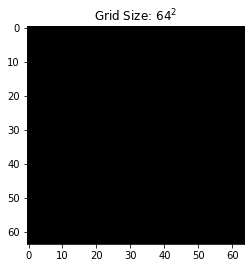

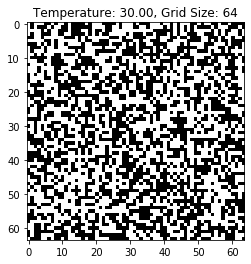

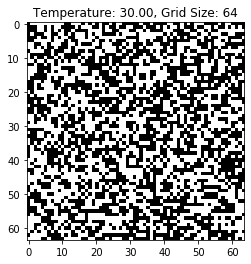

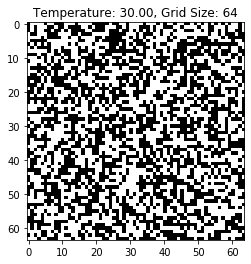

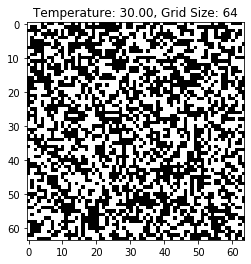

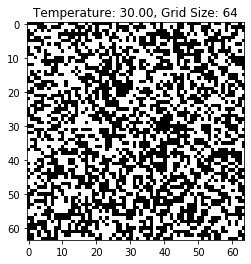

<Figure size 432x288 with 0 Axes>

In [2]:
def Ising(spins_init, Temp, nsteps=None):
    """
    Ising Model.
        spins_init: initial configuration
        Temp: the Temperature
        updates: the number of updates to perform
    """
    spins = spins_init.astype(np.int8)  # copy and save some space :)
    L = spins.shape[0]
    N = L * L
    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=np.int8)
    Temp = Temp
    if nsteps is None:
        nsteps = L * L * 800  # number of updates

    for n in range(nsteps):
        r, c = np.random.randint(0, L, 2)  # select a vertex at random
        C = [(c-1) % L, c % L, (c + 1) % L]
        R = [[(r-1) % L], [r % L], [(r+1) % L]]
        DH = -spins[r, c] * np.sum(kernel * spins[R, C]) / Temp
        if np.log(np.random.rand()) < DH:
            spins[r, c] *= -1  # switch sign
    
    return spins

L = 64 
probOfWhite = .0
spins = 2 * (np.random.rand(L, L) > probOfWhite) - 1 

plt.imshow(spins, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
plt.title(r"Grid Size: $%d^2$" % (L))
plt.show()
plt.cla()
plt.clf()

for Temperature in [30.,30.,30.,30.,30.]:
    spins_i = Ising(spins,Temperature,100000)
    plt.imshow(spins_i, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temperature: %.2f, Grid Size: %d" % (Temperature, L))
    plt.show()
    plt.cla()
    plt.clf()

β) Έπειτα, κάνουμε το ίδιο αλλάζοντας την θερμοκρασία.

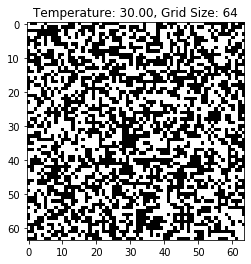

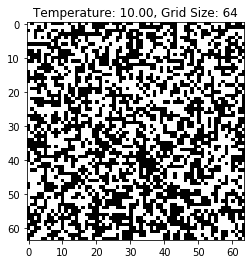

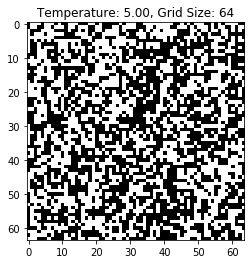

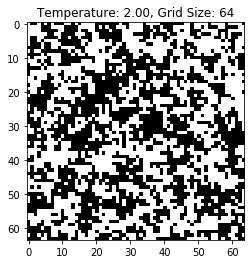

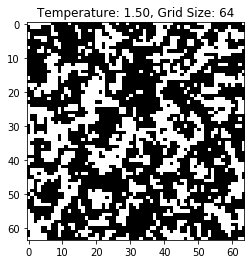

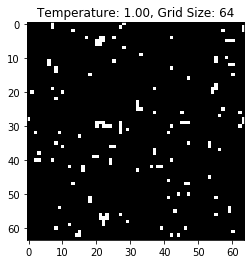

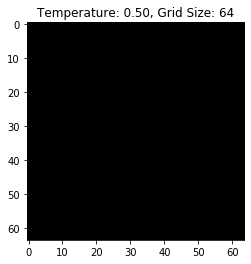

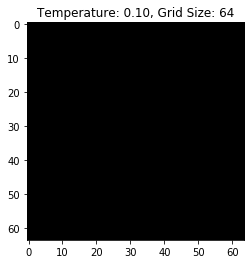

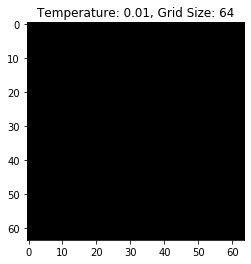

<Figure size 432x288 with 0 Axes>

In [3]:
means = []
for Temperature in [30., 10., 5., 2., 1.5, 1., 0.5, 0.1, 0.01]:
    spins_i = Ising(spins,Temperature,100000)
    means.append(np.mean(spins_i))
    plt.imshow(spins_i, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temperature: %.2f, Grid Size: %d" % (Temperature, L))
    plt.show()
    plt.cla()
    plt.clf()

γ) Στην συνέχεια, παρακολουθούμε την μέση τιμή της μαγνύτησης του πλαισίου στην αλλαγή της θερμοκρασίας.

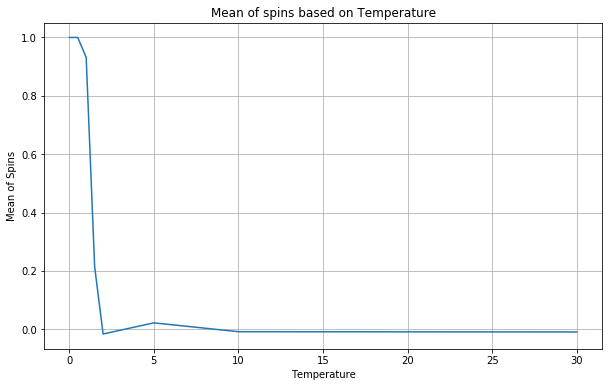

<Figure size 720x432 with 0 Axes>

In [4]:
plt.rcParams["figure.figsize"] = (10, 6)  # increase default figure size

plt.plot([30., 10., 5., 2., 1.5, 1., 0.5, 0.1, 0.01],means)
plt.xlabel("Temperature")
plt.ylabel("Mean of Spins")
plt.title("Mean of spins based on Temperature")
plt.grid()
plt.show()
plt.cla()
plt.clf()

δ) Τέλος, για σταθερή θερμοκρασία $T = 0.1$, αλλάζουμε τιμή της παραμέτρου $nsteps \in [10,20,50,100,200,400,800 \cdot L \cdot L]$.

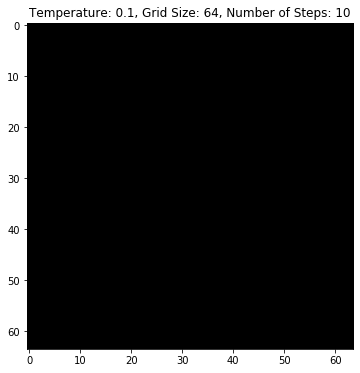

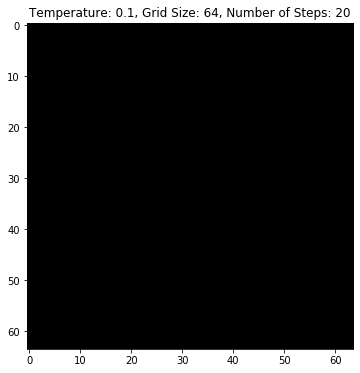

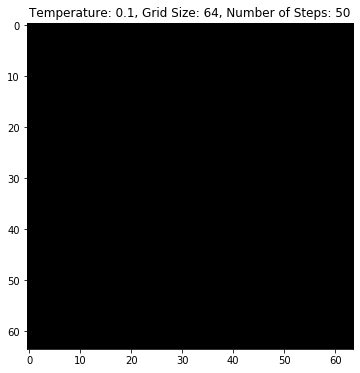

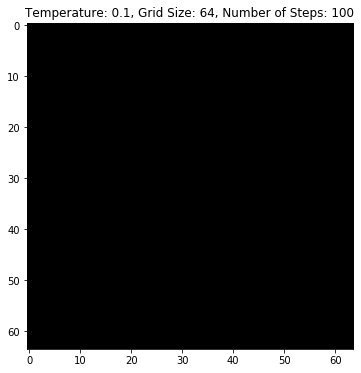

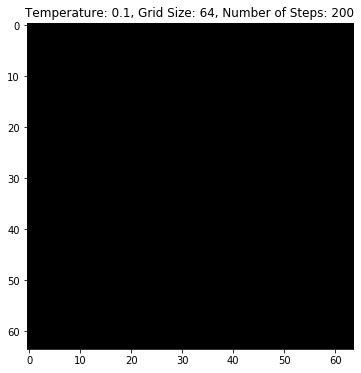

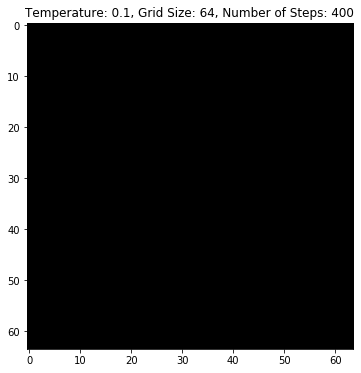

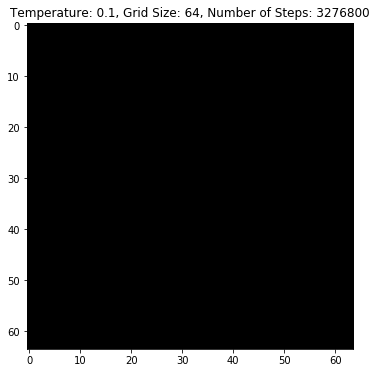

<Figure size 720x432 with 0 Axes>

In [5]:
Temperature = 0.1
for nsteps in [10,20,50,100,200,400,800 * L * L]:
    spins_i = Ising(spins,Temperature,nsteps)
    plt.imshow(spins_i, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temperature: %.1f, Grid Size: %d, Number of Steps: %d" % (Temperature, L, nsteps))
    plt.show()
    plt.cla()
    plt.clf()